<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%207/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/Colab Notebooks/s7'
sys.path.append(folder)

In [0]:
%matplotlib inline
import torch
import data_loading
import show_images
import dnn_architecture
import train_and_test
import evaluate

In [4]:
classes, trainloader, testloader = data_loading.load()


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])
  cat truck truck   cat   cat


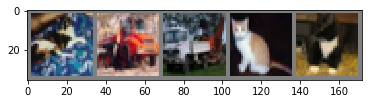

In [5]:
show_images.show_random_images(trainloader, classes)

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = dnn_architecture.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
         MaxPool2d-9           [-1, 16, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           4,608
             ReLU-11           [-1, 32, 16, 16]               0
      BatchNorm2d-12           [-1, 32, 16, 16]              64
          Dropout-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=12, gamma=0.1)

In [8]:

EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1,"lr:",optimizer.param_groups[0]['lr'])
    train_and_test.train(model, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    train_and_test.test(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 lr: 0.1


Loss=1.2922406196594238 Batch_id=390 Accuracy=48.35: 100%|██████████| 391/391 [00:12<00:00, 36.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 6020/10000 (60.20%)

EPOCH: 2 lr: 0.1


Loss=0.9983938932418823 Batch_id=390 Accuracy=63.82: 100%|██████████| 391/391 [00:12<00:00, 30.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 6701/10000 (67.01%)

EPOCH: 3 lr: 0.1


Loss=0.9969171285629272 Batch_id=390 Accuracy=69.07: 100%|██████████| 391/391 [00:12<00:00, 30.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7208/10000 (72.08%)

EPOCH: 4 lr: 0.1


Loss=0.7277615070343018 Batch_id=390 Accuracy=72.14: 100%|██████████| 391/391 [00:12<00:00, 36.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7363/10000 (73.63%)

EPOCH: 5 lr: 0.1


Loss=0.8801579475402832 Batch_id=390 Accuracy=74.51: 100%|██████████| 391/391 [00:12<00:00, 30.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7295/10000 (72.95%)

EPOCH: 6 lr: 0.1


Loss=0.7661792039871216 Batch_id=390 Accuracy=76.13: 100%|██████████| 391/391 [00:12<00:00, 30.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7310/10000 (73.10%)

EPOCH: 7 lr: 0.1


Loss=0.6109440922737122 Batch_id=390 Accuracy=77.46: 100%|██████████| 391/391 [00:12<00:00, 31.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7677/10000 (76.77%)

EPOCH: 8 lr: 0.1


Loss=0.3921006917953491 Batch_id=390 Accuracy=78.61: 100%|██████████| 391/391 [00:12<00:00, 30.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7751/10000 (77.51%)

EPOCH: 9 lr: 0.1


Loss=0.6558874249458313 Batch_id=390 Accuracy=79.59: 100%|██████████| 391/391 [00:12<00:00, 31.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7765/10000 (77.65%)

EPOCH: 10 lr: 0.1


Loss=0.44370555877685547 Batch_id=390 Accuracy=80.01: 100%|██████████| 391/391 [00:12<00:00, 38.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7886/10000 (78.86%)

EPOCH: 11 lr: 0.1


Loss=0.672635018825531 Batch_id=390 Accuracy=80.83: 100%|██████████| 391/391 [00:12<00:00, 30.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7860/10000 (78.60%)

EPOCH: 12 lr: 0.1


Loss=0.47560447454452515 Batch_id=390 Accuracy=81.48: 100%|██████████| 391/391 [00:12<00:00, 31.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7836/10000 (78.36%)

EPOCH: 13 lr: 0.010000000000000002


Loss=0.367512583732605 Batch_id=390 Accuracy=84.92: 100%|██████████| 391/391 [00:12<00:00, 38.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8090/10000 (80.90%)

EPOCH: 14 lr: 0.010000000000000002


Loss=0.578126072883606 Batch_id=390 Accuracy=86.00: 100%|██████████| 391/391 [00:12<00:00, 37.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8110/10000 (81.10%)

EPOCH: 15 lr: 0.010000000000000002


Loss=0.4585985541343689 Batch_id=390 Accuracy=86.25: 100%|██████████| 391/391 [00:12<00:00, 31.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8116/10000 (81.16%)

EPOCH: 16 lr: 0.010000000000000002


Loss=0.4888301491737366 Batch_id=390 Accuracy=86.46: 100%|██████████| 391/391 [00:12<00:00, 31.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8130/10000 (81.30%)

EPOCH: 17 lr: 0.010000000000000002


Loss=0.468496710062027 Batch_id=390 Accuracy=86.76: 100%|██████████| 391/391 [00:12<00:00, 31.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8154/10000 (81.54%)

EPOCH: 18 lr: 0.010000000000000002


Loss=0.3006743788719177 Batch_id=390 Accuracy=86.73: 100%|██████████| 391/391 [00:12<00:00, 31.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8157/10000 (81.57%)

EPOCH: 19 lr: 0.010000000000000002


Loss=0.41136565804481506 Batch_id=390 Accuracy=87.01: 100%|██████████| 391/391 [00:12<00:00, 32.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8169/10000 (81.69%)

EPOCH: 20 lr: 0.010000000000000002


Loss=0.41222715377807617 Batch_id=390 Accuracy=87.14: 100%|██████████| 391/391 [00:12<00:00, 31.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8173/10000 (81.73%)

EPOCH: 21 lr: 0.010000000000000002


Loss=0.32827746868133545 Batch_id=390 Accuracy=87.34: 100%|██████████| 391/391 [00:12<00:00, 31.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8144/10000 (81.44%)

EPOCH: 22 lr: 0.010000000000000002


Loss=0.5531190037727356 Batch_id=390 Accuracy=87.54: 100%|██████████| 391/391 [00:12<00:00, 31.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8148/10000 (81.48%)

EPOCH: 23 lr: 0.010000000000000002


Loss=0.37740805745124817 Batch_id=390 Accuracy=87.67: 100%|██████████| 391/391 [00:12<00:00, 31.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8135/10000 (81.35%)

EPOCH: 24 lr: 0.010000000000000002


Loss=0.28552573919296265 Batch_id=390 Accuracy=87.62: 100%|██████████| 391/391 [00:12<00:00, 31.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8167/10000 (81.67%)

EPOCH: 25 lr: 0.0010000000000000002


Loss=0.5685023665428162 Batch_id=390 Accuracy=88.14: 100%|██████████| 391/391 [00:12<00:00, 31.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8170/10000 (81.70%)

EPOCH: 26 lr: 0.0010000000000000002


Loss=0.45779576897621155 Batch_id=390 Accuracy=88.48: 100%|██████████| 391/391 [00:12<00:00, 31.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8188/10000 (81.88%)

EPOCH: 27 lr: 0.0010000000000000002


Loss=0.18011918663978577 Batch_id=390 Accuracy=88.36: 100%|██████████| 391/391 [00:12<00:00, 31.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8172/10000 (81.72%)

EPOCH: 28 lr: 0.0010000000000000002


Loss=0.4832134246826172 Batch_id=390 Accuracy=88.16: 100%|██████████| 391/391 [00:12<00:00, 36.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8181/10000 (81.81%)

EPOCH: 29 lr: 0.0010000000000000002


Loss=0.27454692125320435 Batch_id=390 Accuracy=88.55: 100%|██████████| 391/391 [00:12<00:00, 30.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8183/10000 (81.83%)

EPOCH: 30 lr: 0.0010000000000000002


Loss=0.38076451420783997 Batch_id=390 Accuracy=88.34: 100%|██████████| 391/391 [00:12<00:00, 30.55it/s]



Test set: Average loss: 0.0046, Accuracy: 8176/10000 (81.76%)



GroundTruth:   bird   cat   car   dog   car
Predicted:  horse   cat   car  bird   car


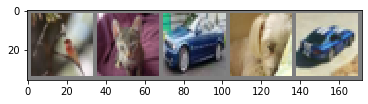

In [9]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [10]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 81 %


In [11]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 85 %
Accuracy of   car : 88 %
Accuracy of  bird : 73 %
Accuracy of   cat : 68 %
Accuracy of  deer : 83 %
Accuracy of   dog : 76 %
Accuracy of  frog : 82 %
Accuracy of horse : 84 %
Accuracy of  ship : 96 %
Accuracy of truck : 85 %
